In [6]:
## Bilby Practice
import numpy as np
import matplotlib.pyplot as plot
import bilby
import scipy

In [7]:
np.random.seed(123)

The Bayesian Inference is 

$p(\mu,\sigma/data) =  \frac{p(data/\mu,\sigma) p(\mu,\sigma)}{Z}$

where priors on the parameters $\mu$ and $\sigma$ is given by $p(\mu,\sigma)$ and given the Likelihood is given by $p(data/\mu,\sigma)$ ,
Z is the evidence 

Problem Statement:  The Bilby library is used calculate the posterior on $\mu$ and $\sigma$ with the no initial prior knowledge. The data is random gaussian data with $\mu = 3$ and $\sigma = 4$ and the estimation of the parameters from the given data is being done

18:28 bilby INFO    : Running for label 'Gaussian Bayesian Inference', output will be saved to 'outdir'
18:28 bilby INFO    : Analysis priors:
18:28 bilby INFO    : mu=Uniform(minimum=0, maximum=10, name='mu', latex_label='mu', unit=None, boundary=None)
18:28 bilby INFO    : sigma=Uniform(minimum=0, maximum=10, name='sigma', latex_label='sigma', unit=None, boundary=None)
18:28 bilby INFO    : Analysis likelihood class: <class '__main__.My_likelihood'>
18:28 bilby INFO    : Analysis likelihood noise evidence: nan
18:28 bilby INFO    : Single likelihood evaluation took 7.747e-05 s
18:28 bilby INFO    : Checkpoint every check_point_delta_t = 600s
18:28 bilby WARNING : Using cached result
18:28 bilby INFO    : Summary of results:
nsamples: 2695
ln_noise_evidence:    nan
ln_evidence: -297.321 +/-  0.080
ln_bayes_factor:    nan +/-  0.080



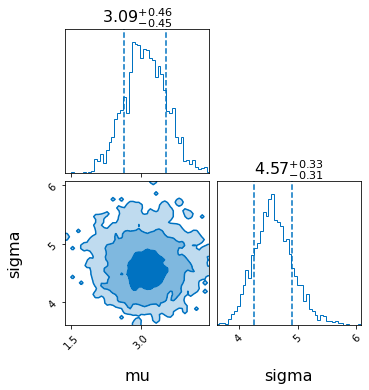

In [10]:
#1

my_prior = dict( mu = bilby.core.prior.Uniform(0,10,"mu"),           ##Defining the prior 
              sigma = bilby.core.prior.Uniform(0,10,"sigma"))

class My_likelihood(bilby.Likelihood):                               ##Defining the log-likelihood for N points 

    def __init__(self,data):
        super().__init__(parameters={"mu": None, "sigma": None})
        self.data = data
        self.N = len(data)

    def log_likelihood(self):                                        ##Gaussian Likelihood = Log of (e^(x_i - mu)**2/sigma**2)/(2*pi*sigma**2)**1/2
        mu = self.parameters["mu"]
        sigma = self.parameters["sigma"]
        res = self.data - mu
        return -0.5 * (
            np.sum((res / sigma) ** 2) + self.N * np.log(2 * np.pi * sigma**2)
        )

data = np.random.normal(3,4,100)                                      ##Data 

likelihood = My_likelihood(data)                                      ##Calculating the log-likelihood on the data (N = 100)

##Result
result = bilby.run_sampler(likelihood=likelihood,                     ##Executing the inference  no. of live points = 1000 
                           priors = my_prior,
                           sampler = "dynesty",
                           nlive=1000,
                           outdir="outdir",
                           label = "Gaussian Bayesian Inference")

result.plot_corner()

In [23]:
result.samples

array([[3.26144944, 6.07511978],
       [1.37637514, 5.13506223],
       [4.20635623, 3.88527175],
       ...,
       [3.08900951, 4.51453443],
       [3.11994274, 4.50633318],
       [3.10489918, 4.50577594]])